In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib
from matplotlib import pyplot as plt

torch.manual_seed(1)

# Load the open source library created by task 4

In [2]:
import arch_blocks

In [3]:
sentences = [
    ("Dave Beck poured hydrochloric acid onto graphene.".split(),    ['O','O', 'O', 'B-MOL-I', 'E-MOL-I', 'O', 'S-MOL-I']),
    ("Dave Juergens likes Si because it is semiconducting.".split(), ['O', 'O', 'O', 'S-MOL-I', 'O', 'O', 'O', 'S-PRO']),
    ("Clearly Silicon is a conductor.".split(),                      ['O', 'S-MOL-I', 'O', 'O', 'S-PRO']),
    ("There is merit to conductors like Copper, Silver, Gold, Lithium, and Silicon".split(), 
                                                                     ['O','O','O','O','S-PRO', 'O', 'S-MOL-I','S-MOL-I', 
                                                                      'S-MOL-I', 'S-MOL-I', 'O', 'S-MOL-I']),
    ("Li is corrosive, but also semiconducting.".split(),            ["S-MOL-I", "O", "S-PRO", 'O', 'O', "S-PRO"]),
    ("SiO2Li is highly unstable.".split(),                           ['S-MOL-I', 'O', 'O', 'S-PRO'])
]

In [4]:
# This makes a simple dictionary map for every word and every character in the training data
word_to_ix = {}
char_to_ix = {}
for sent, tags in sentences:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
        
        for char in word:
            if char not in char_to_ix:
                char_to_ix[char] = len(char_to_ix)
print(word_to_ix)
print(char_to_ix)

{'Dave': 0, 'Beck': 1, 'poured': 2, 'hydrochloric': 3, 'acid': 4, 'onto': 5, 'graphene.': 6, 'Juergens': 7, 'likes': 8, 'Si': 9, 'because': 10, 'it': 11, 'is': 12, 'semiconducting.': 13, 'Clearly': 14, 'Silicon': 15, 'a': 16, 'conductor.': 17, 'There': 18, 'merit': 19, 'to': 20, 'conductors': 21, 'like': 22, 'Copper,': 23, 'Silver,': 24, 'Gold,': 25, 'Lithium,': 26, 'and': 27, 'Li': 28, 'corrosive,': 29, 'but': 30, 'also': 31, 'SiO2Li': 32, 'highly': 33, 'unstable.': 34}
{'D': 0, 'a': 1, 'v': 2, 'e': 3, 'B': 4, 'c': 5, 'k': 6, 'p': 7, 'o': 8, 'u': 9, 'r': 10, 'd': 11, 'h': 12, 'y': 13, 'l': 14, 'i': 15, 'n': 16, 't': 17, 'g': 18, '.': 19, 'J': 20, 's': 21, 'S': 22, 'b': 23, 'm': 24, 'C': 25, 'T': 26, ',': 27, 'G': 28, 'L': 29, 'O': 30, '2': 31}


In [5]:
tag_to_ix = {'O':0, 'B-MOL-I':1, 'E-MOL-I':2, 'S-MOL-I':3, 'I-MOL-I':4, 'B-PRO':5, 'E-PRO':6, 'S-PRO':7, 'I-PRO':8}

In [6]:
word_em_dim = 6
word_hidden_dim = 6
char_em_dim = 6
char_hidden_dim = 6

In [7]:
model = arch_blocks.CharLSTMTagger(word_em_dim, word_hidden_dim,
                               char_em_dim, char_hidden_dim,
                               len(word_to_ix), len(char_to_ix),
                               len(tag_to_ix))

Text(0, 0.5, 'Cross entropy loss')

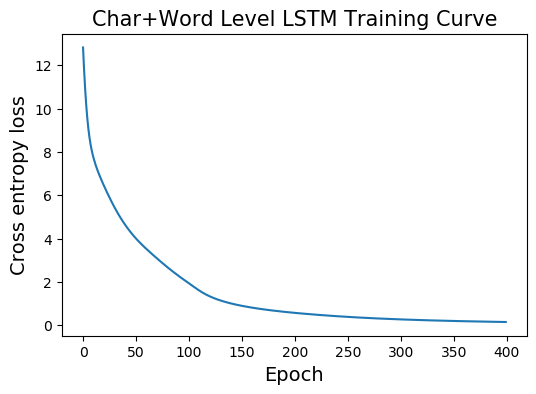

In [8]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
epoch_losses = []
num_epochs = 400
for epoch in range(num_epochs):
    epoch_loss = 0
    for sentence, tags in sentences:
        #reset gradients
        model.zero_grad()
        
        # ready the x's and y's 
        sentence_in = arch_blocks.prepare_sequence(sentence, word_to_ix, level='word')
        chars_in = arch_blocks.prepare_sequence(sentence, char_to_ix, level='char')
        targets = arch_blocks.prepare_sequence(tags, tag_to_ix, level='word')
        
        #send the words and characters (x) through model and get tag_scores (y)
        tag_scores = model(sentence_in, chars_in)


        loss = loss_function(tag_scores, targets)
        epoch_loss += loss
        
        loss.backward()
        optimizer.step()
    epoch_losses.append(epoch_loss)

plt.figure(dpi=100)
plt.plot(range(num_epochs), epoch_losses)
plt.title('Char+Word Level LSTM Training Curve', fontsize=15)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Cross entropy loss', fontsize=14)

In [9]:
model = arch_blocks.WordLSTMTagger(word_em_dim, word_hidden_dim,
                               char_em_dim, char_hidden_dim,
                               len(word_to_ix), len(char_to_ix),
                               len(tag_to_ix))

Text(0, 0.5, 'Cross entropy loss')

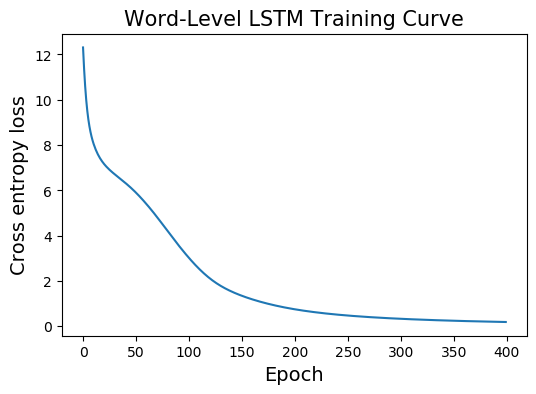

In [10]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
epoch_losses = []
num_epochs = 400
for epoch in range(num_epochs):
    epoch_loss = 0
    for sentence, tags in sentences:
        #reset gradients
        model.zero_grad()
        
        # ready the x's and y's 
        sentence_in = arch_blocks.prepare_sequence(sentence, word_to_ix, level='word')
        chars_in = arch_blocks.prepare_sequence(sentence, char_to_ix, level='char')
        targets = arch_blocks.prepare_sequence(tags, tag_to_ix, level='word')
        
        #send the words and characters (x) through model and get tag_scores (y)
        tag_scores = model(sentence_in, chars_in)


        loss = loss_function(tag_scores, targets)
        epoch_loss += loss
        
        loss.backward()
        optimizer.step()
    epoch_losses.append(epoch_loss)

plt.figure(dpi=100)
plt.plot(range(num_epochs), epoch_losses)
plt.title('Word-Level LSTM Training Curve', fontsize=15)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Cross entropy loss', fontsize=14)

In [11]:
lin_model = arch_blocks.LinearModel(6,8)

In [12]:
N, D_in, H, D_out = 22, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [13]:
x.shape

torch.Size([22, 1000])

In [14]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [15]:
model(x).shape

torch.Size([22, 10])

In [16]:
ten1 = torch.tensor([x for x in range(10)])

In [17]:
ten1

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
ten2 = torch.cat((ten1.view(1,-1), ten1.view(1,-1)))

In [19]:
ten2

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [20]:
ten2.view(-1,len(ten2[0]))

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [21]:
ten2 = torch.cat((ten2.view(-1, len(ten2[0])), ten1))

RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 2 and 1 at /Users/distiller/project/conda/conda-bld/pytorch_1579022061893/work/aten/src/TH/generic/THTensor.cpp:603

In [ ]:
ten2.view(-1, len(ten2[0])).shape

In [ ]:
ten3 = torch.zeros(1,10)

In [ ]:
ten3

In [ ]:
ten2[0] = ten3

In [ ]:
ten2